# Tes `SORA` dengan data SAO 185716

In [1]:
%config InlineBackend.figure_format = 'retina'

from sora import LightCurve, Body, Star, Observer, Occultation
import arviz as az
az.style.use('arviz-darkgrid')

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import os

from astropy.time import Time
import astropy.units as u

import numpy as np

from skyfield.api import load

# plt.rcParams['figure.figsize'] = (12,5)

pd.set_option('display.float_format',  '{:}'.format)

SORA version: 0.2.1


In [3]:
df = pd.read_csv('sao185716.csv', sep=',')
df.tail()

,FrameNum,timeInfo,signal-obj,appsum-obj,avgbkg-obj,stdbkg-obj,nmaskpx-obj,maxpx-obj,xcentroid-obj,ycentroid-obj
1996,6996.0,[13:45:30.3704528],2011.0,794128.0,21408.56,1289.88,-37,26384,359.0,204.0
1997,6997.0,[13:45:30.3805524],2242.0,793600.0,21388.06,1302.79,-37,26416,359.0,204.0
1998,6998.0,[13:45:30.3906521],2700.0,794848.0,21409.4,1285.38,-37,25904,359.0,204.0
1999,6999.0,[13:45:30.4007518],-1193.0,789632.0,21373.65,1277.46,-37,25904,359.0,204.0
2000,7000.0,[13:45:30.4108515],3546.0,796384.0,21428.06,1306.35,-37,26832,359.0,204.0


In [4]:
# hilangkan karakter [ dan ] dari data
df['timeInfo'] = df['timeInfo'].map((lambda x: x.lstrip('[').rstrip(']')))

# ubah ke format waktu dan ambil tanggal dan jamnya
df['timeInfo'] = pd.to_datetime(df['timeInfo'])

df.tail()

,FrameNum,timeInfo,signal-obj,appsum-obj,avgbkg-obj,stdbkg-obj,nmaskpx-obj,maxpx-obj,xcentroid-obj,ycentroid-obj
1996,6996.0,2022-08-10 13:45:30.370452,2011.0,794128.0,21408.56,1289.88,-37,26384,359.0,204.0
1997,6997.0,2022-08-10 13:45:30.380552,2242.0,793600.0,21388.06,1302.79,-37,26416,359.0,204.0
1998,6998.0,2022-08-10 13:45:30.390652,2700.0,794848.0,21409.4,1285.38,-37,25904,359.0,204.0
1999,6999.0,2022-08-10 13:45:30.400751,-1193.0,789632.0,21373.65,1277.46,-37,25904,359.0,204.0
2000,7000.0,2022-08-10 13:45:30.410851,3546.0,796384.0,21428.06,1306.35,-37,26832,359.0,204.0


In [5]:
data = df[['FrameNum','timeInfo','signal-obj']]
data.columns = ['Frame','Time', 'Value']
data.tail()

,Frame,Time,Value
1996,6996.0,2022-08-10 13:45:30.370452,2011.0
1997,6997.0,2022-08-10 13:45:30.380552,2242.0
1998,6998.0,2022-08-10 13:45:30.390652,2700.0
1999,6999.0,2022-08-10 13:45:30.400751,-1193.0
2000,7000.0,2022-08-10 13:45:30.410851,3546.0


In [6]:
data_cp = data.copy()

data_cp['JD'] = Time(data_cp['Time']).jd

data_cp['frac_JD'] = data_cp['JD'] - np.floor(data_cp['JD']).astype(int)
data_cp

,Frame,Time,Value,JD,frac_JD
0,5000.0,2022-08-10 13:45:10.201339,95143.0,2459802.0730347377,0.07303473772481084
1,5001.0,2022-08-10 13:45:10.211438,74148.0,2459802.0730348546,0.07303485460579395
2,5002.0,2022-08-10 13:45:10.221538,72501.0,2459802.0730349715,0.07303497148677707
3,5003.0,2022-08-10 13:45:10.231638,95052.0,2459802.0730350884,0.07303508836776018
4,5004.0,2022-08-10 13:45:10.241737,59529.0,2459802.0730352052,0.0730352052487433
...,...,...,...,...,...
1996,6996.0,2022-08-10 13:45:30.370452,2011.0,2459802.0732681765,0.07326817652210593
1997,6997.0,2022-08-10 13:45:30.380552,2242.0,2459802.0732682934,0.07326829340308905
1998,6998.0,2022-08-10 13:45:30.390652,2700.0,2459802.0732684103,0.07326841028407216
1999,6999.0,2022-08-10 13:45:30.400751,-1193.0,2459802.073268527,0.07326852716505527


Text(0.5, 0, 'Frames')

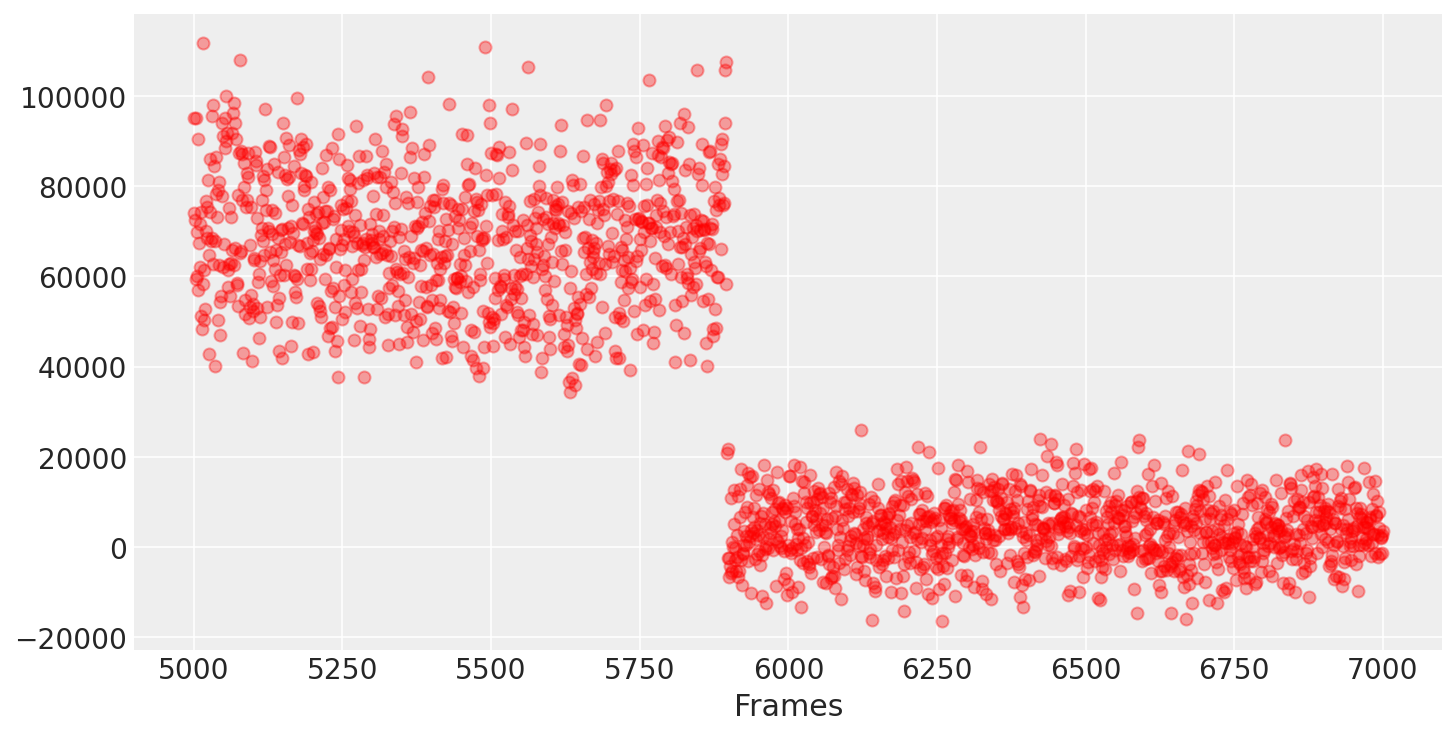

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_cp['Frame'], data_cp['Value'], 'ro', alpha=0.35)
# ax.set_xlim(3300, 3700)
ax.set_xlabel('Frames')

## *Data smoothing*

In [8]:
# from scipy.signal import savgol_filter

# x = data_cp['Frame']
# y = data_cp['Value']
# y_filtered = savgol_filter(y, 10, 3)

In [9]:
# plt.figure(figsize=(10,5))
# plt.scatter(x, y_filtered, c='r', marker='o', alpha=0.3)
# # plt.xlim(3300, 3700)

## Normalisasi

Text(0.5, 0, 'Frames')

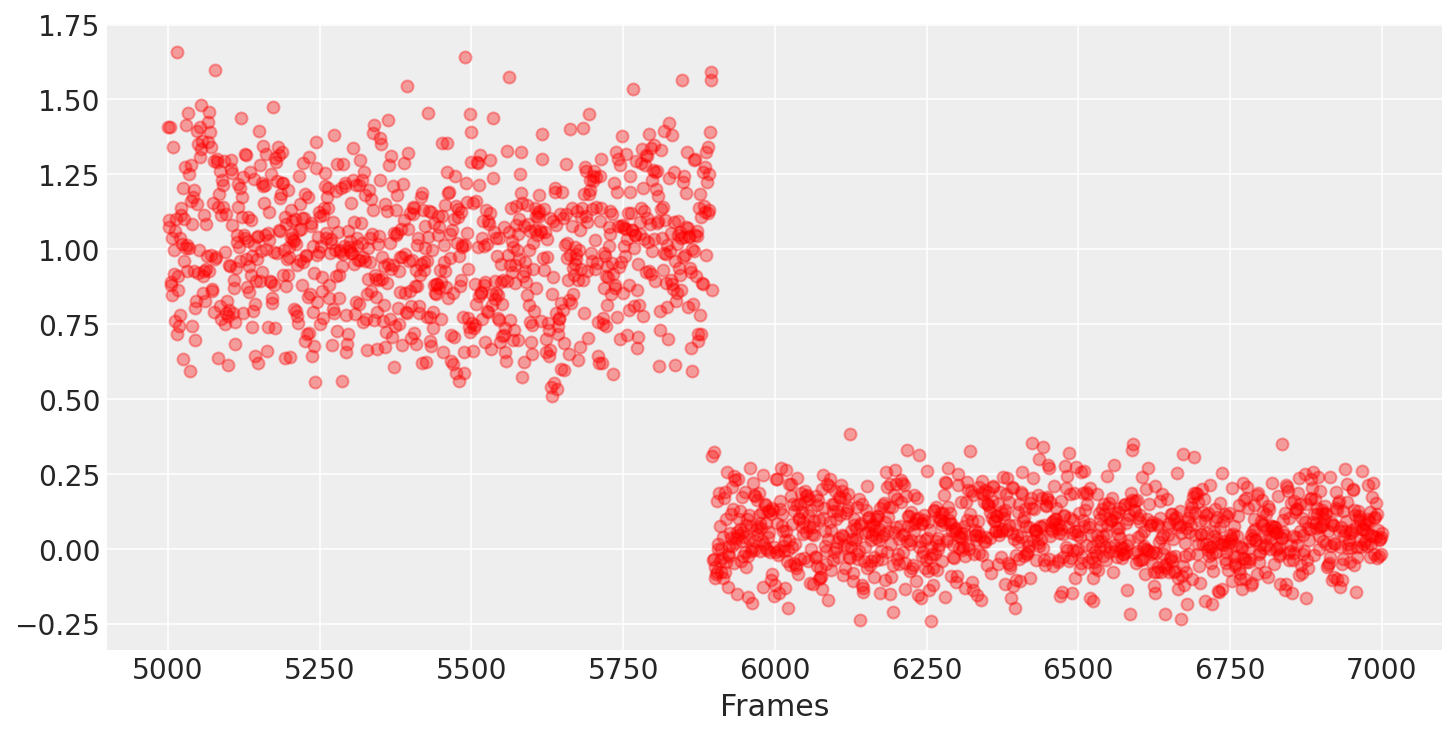

In [10]:
# data_cp['y_scaled'] = y_filtered/(y_filtered.std()*2)

data_cp['y_scaled'] = data_cp['Value']/(data_cp['Value'].std()*2)


fig, ax = plt.subplots(figsize=(10,5))

ax.plot(data_cp['Frame'], data_cp['y_scaled'], 'ro', alpha=0.35)
ax.set_xlabel('Frames')

In [13]:
# tulis ke dalam file csv yang baru
data_cp.to_csv('lc_sao185716.csv', header=False, columns=['JD', 'y_scaled'], index=False, sep='\t')

In [14]:
data_cp

,Frame,Time,Value,JD,frac_JD,y_scaled
0,5000.0,2022-08-10 13:45:10.201339,95143.0,2459802.0730347377,0.07303473772481084,1.4094054616895018
1,5001.0,2022-08-10 13:45:10.211438,74148.0,2459802.0730348546,0.07303485460579395,1.0983950072349324
2,5002.0,2022-08-10 13:45:10.221538,72501.0,2459802.0730349715,0.07303497148677707,1.0739970925654074
3,5003.0,2022-08-10 13:45:10.231638,95052.0,2459802.0730350884,0.07303508836776018,1.4080574287599774
4,5004.0,2022-08-10 13:45:10.241737,59529.0,2459802.0730352052,0.0730352052487433,0.8818357391391312
...,...,...,...,...,...,...
1996,6996.0,2022-08-10 13:45:30.370452,2011.0,2459802.0732681765,0.07326817652210593,0.029790046387622716
1997,6997.0,2022-08-10 13:45:30.380552,2242.0,2459802.0732682934,0.07326829340308905,0.033211976131800165
1998,6998.0,2022-08-10 13:45:30.390652,2700.0,2459802.0732684103,0.07326841028407216,0.039996581425450685
1999,6999.0,2022-08-10 13:45:30.400751,-1193.0,2459802.073268527,0.07326852716505527,-0.017672563570578767


## Kurva cahaya untuk `SORA`

In [16]:
lc = LightCurve(name='SAO 185716', file='lc_sao185716.csv', exptime=0.01)

print(lc)

Light curve name: SAO 185716
Initial time: 2022-08-10 13:45:10.201 UTC
End time:     2022-08-10 13:45:30.411 UTC
Duration:     0.337 minutes
Time offset:  0.000 seconds

Exposure time:    0.0100 seconds
Cycle time:       0.0101 seconds
Num. data points: 2001


There is no occultation associated with this light curve.

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




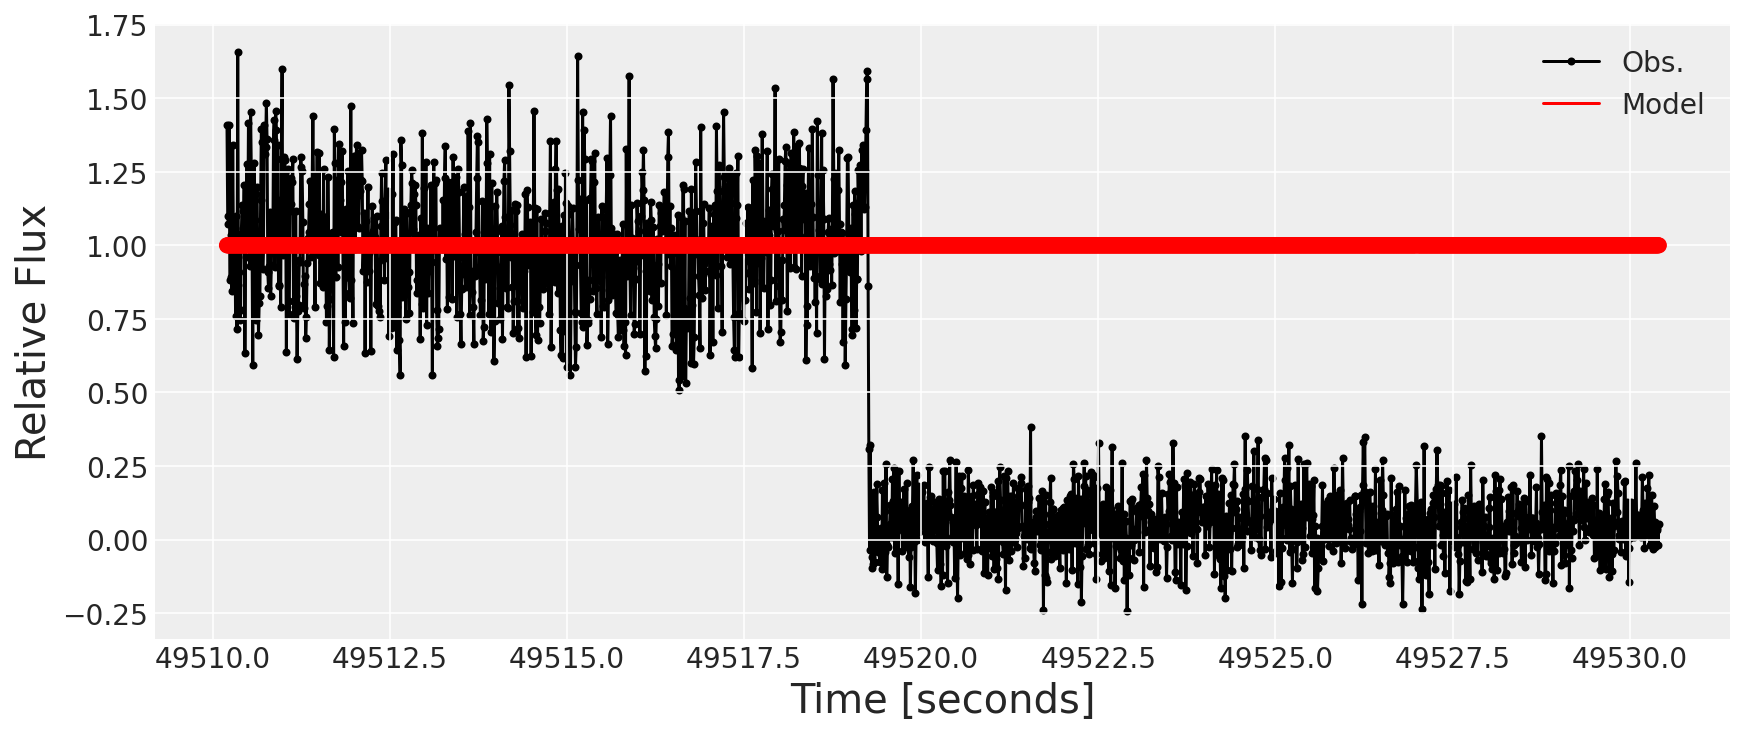

In [17]:
plt.figure(figsize=(12,5))
lc.plot_lc()
# plt.xlim(46628,46633)

{'rank': 1,
 'occultation_duration': 11.14371344447136,
 'central_time': 49524.8290412128,
 'immersion_time': 49519.25718449056,
 'emersion_time': 49530.40089793503,
 'time_err': 0.005049258470535278,
 'depth': 0.949651102778344,
 'depth_err': 0.105461941458572,
 'baseline': 1.0056081346172332,
 'baseline_err': 0.21466403354520971,
 'snr': 9.004680642555684,
 'occ_mask': array([False, False, False, ...,  True,  True, False])}

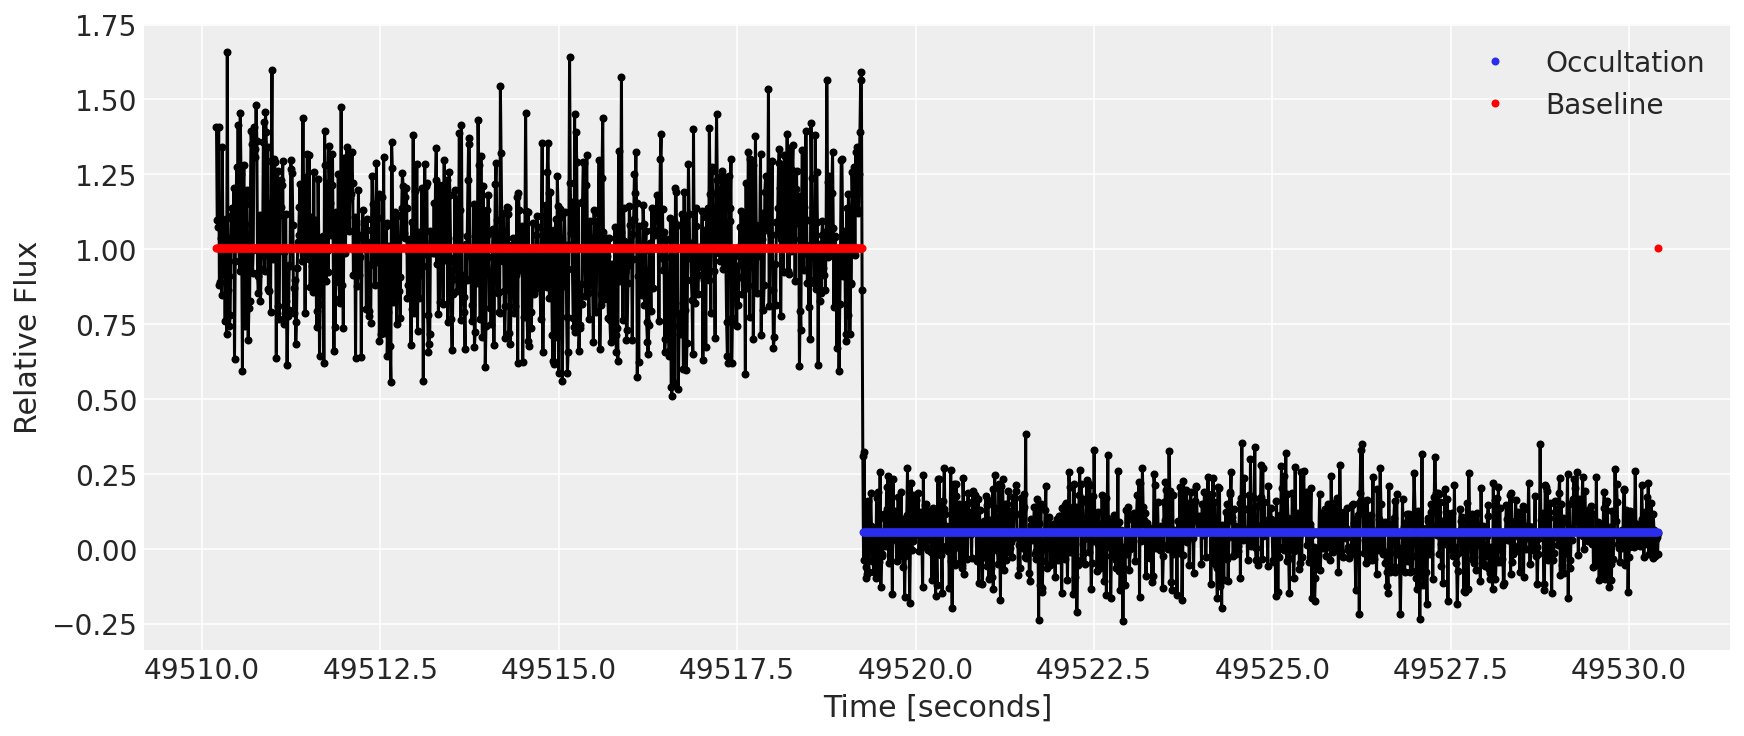

In [18]:
plt.figure(figsize=(12,5))
tes = lc.occ_detect(plot=True)
tes

## Pembuatan model

Model kurva cahaya okultasi oleh `SORA` memerlukan beberapa input:
 - Kecepatan bayangan saat *event*, dalam km/s
 - Jarak obyek, dalam AU
 - $\lambda$ pusat dan $\Delta \lambda$ (atau *bandwidth*), dalam mikron
 - Proyeksi diameter bintang pada jarak obyek, dalam km

### A. Jarak obyek penutup saat pengamatan

Untuk okultasi Bulan, obyek penutup adalah Bulan. Pengamatan dilakukan pada tanggal **8 Agustus 2022 pukul 13:45:19 UT**. Ephemeris diambil dari https://ssd.jpl.nasa.gov/ftp/eph/planets/ascii/.

In [19]:
# load timescale dan tampilkan waktu saat ini
ts = load.timescale()

# custom waktu untuk yyyy, mm, dd, hh, mm, ss
t = ts.utc(2022, 8, 8, 13, 45, 19)

In [20]:
# Load the JPL ephemeris DE430 (covers 1549-2650) dan cari jarak Bumi-Bulan
planets = load('de430.bsp')
earth, moon = planets['earth'], planets['moon']

In [21]:
# posisi Bulan dari Bumi
astrometric = earth.at(t).observe(moon)
ra, dec, distance = astrometric.radec()

In [22]:
# tampilkan koordinat Bulan dan jarak Bulan dalam AU
print(ra)
print(dec)
print(distance.au)

17h 45m 11.58s
-26deg 32' 20.5"
0.0024297972764774863


In [23]:
d_moon = distance.au
d_moon

0.0024297972764774863

In [24]:
lc.set_dist(dist=d_moon)

lc.dist

0.0024297972764774863

### B. Nilai $\lambda_0$ dan *bandwidth* $\Delta \lambda$

In [25]:
lc.set_filter(central_bandpass=0.55, delta_bandpass=0.2)

print('Observational wavelength centred at {:1.3f} with a bandwidth of {:1.3f} microns'
      .format(lc.central_bandpass,lc.delta_bandpass))

Observational wavelength centred at 0.550 with a bandwidth of 0.200 microns


### C. Proyeksi diameter bintang pada jarak obyek penutup

In [26]:
lc.fresnel_scale

0.009956273157331611

In [27]:
from sora import Star
from sora.star import kervella, van_belle

In [28]:
star = Star(coord='17 46  1.6 -26 58 20')

c:\Users\User\.conda\envs\work2\lib\site-packages\sora\star\core.py:338: UserWarning: This star was indicated as an source with duplicate sources Please be aware that its positions must be handled with care.
  warnings.warn('This star was indicated as an source with duplicate sources '+


1 Gaia-EDR3 star found G=7.176475
star coordinate at J2016.0: RA=17h46m01.58030s +/- 0.0388 mas, DEC=-26d58m20.3059s +/- 0.0292 mas



In [29]:
star.mag

{'G': 7.176475,
 'B': 8.015999794006348,
 'V': 7.453000068664551,
 'R': 7.059999942779541,
 'J': 5.7220001220703125,
 'H': 5.48799991607666,
 'K': 5.343999862670898}

In [30]:
from sora import Observer

bosscha = Observer(name='Bosscha Observatory', code='299')

pos = star.get_position(time='2022-08-08 13:45:19', observer=bosscha)
print(pos.to_string('hmsdms', precision=10))

17h46m01.5797894621s -26d58m20.3206957119s


In [31]:
star.error_at(time='2022-08-08 13:45:19')

(<Quantity 0.32368871 mas>, <Quantity 0.18363022 mas>)

In [32]:
diameter = star.apparent_diameter(distance=d_moon)

diameter

Apparent diameter using Kervella et al. (2004)


<Quantity 0.00071367 km>

In [33]:
diameter.value

0.0007136739796940264

In [34]:
lc.set_star_diam(d_star=diameter.value)

### D. Kecepatan bayangan Bulan di Bumi

Bulan bergerak relatif terhadap bintang latar belakang dengan kecepatan 0.55 arcsec/s. Ubah nilai ini ke dalam km/s. kalikan angka ini dengan $\sin \theta$ di mana $\theta$ adalah sudut kontak (*contact angle*, CA). Pada pekerjaan ini, nilai kecepatan bayangan diambil dari perangkat lunak `OCCULT v4`

In [35]:
from astropy.coordinates import Angle
# ang_vel = 0.55*u.arcsec # dalam arcsec/s

# lin_vel = distance.km * np.tan(ang_vel)

kms = u.km/u.s
lin_vel = 0.6199*kms # dari Occult v4

lin_vel

<Quantity 0.6199 km / s>

In [36]:
lc.set_vel(vel=lin_vel.value)

{'rank': 1,
 'occultation_duration': 11.14371344447136,
 'central_time': 49524.8290412128,
 'immersion_time': 49519.25718449056,
 'emersion_time': 49530.40089793503,
 'time_err': 0.005049258470535278,
 'depth': 0.949651102778344,
 'depth_err': 0.105461941458572,
 'baseline': 1.0056081346172332,
 'baseline_err': 0.21466403354520971,
 'snr': 9.004680642555684,
 'occ_mask': array([False, False, False, ...,  True,  True, False])}

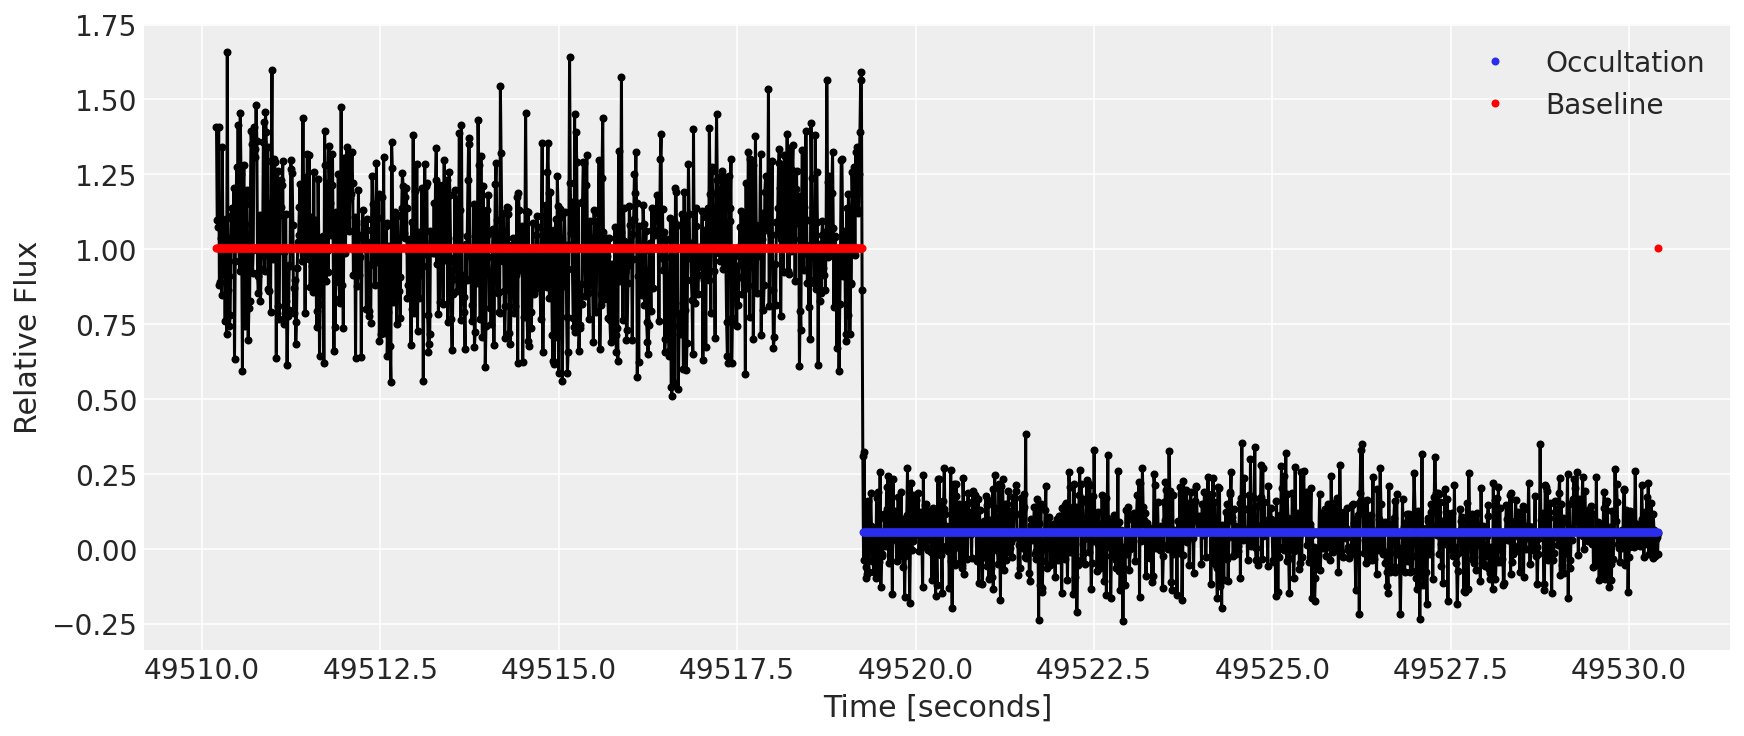

In [37]:
plt.figure(figsize=(12,5))
tes2 = lc.occ_detect(plot=True)

tes2

**Parameter untuk model**

In [38]:
immersion_time = 49519.257  # seconds relative to tref
emersion_time  = 49530  # seconds relative to tref
opacity = 1.0            # 1.0 == opaque; 0.0 == transparent

tmin = immersion_time  - 5 # seconds relative to tref
tmax = emersion_time   + 5 # seconds relative to tref

mask = (lc.time > tmin) & (lc.time < tmax)

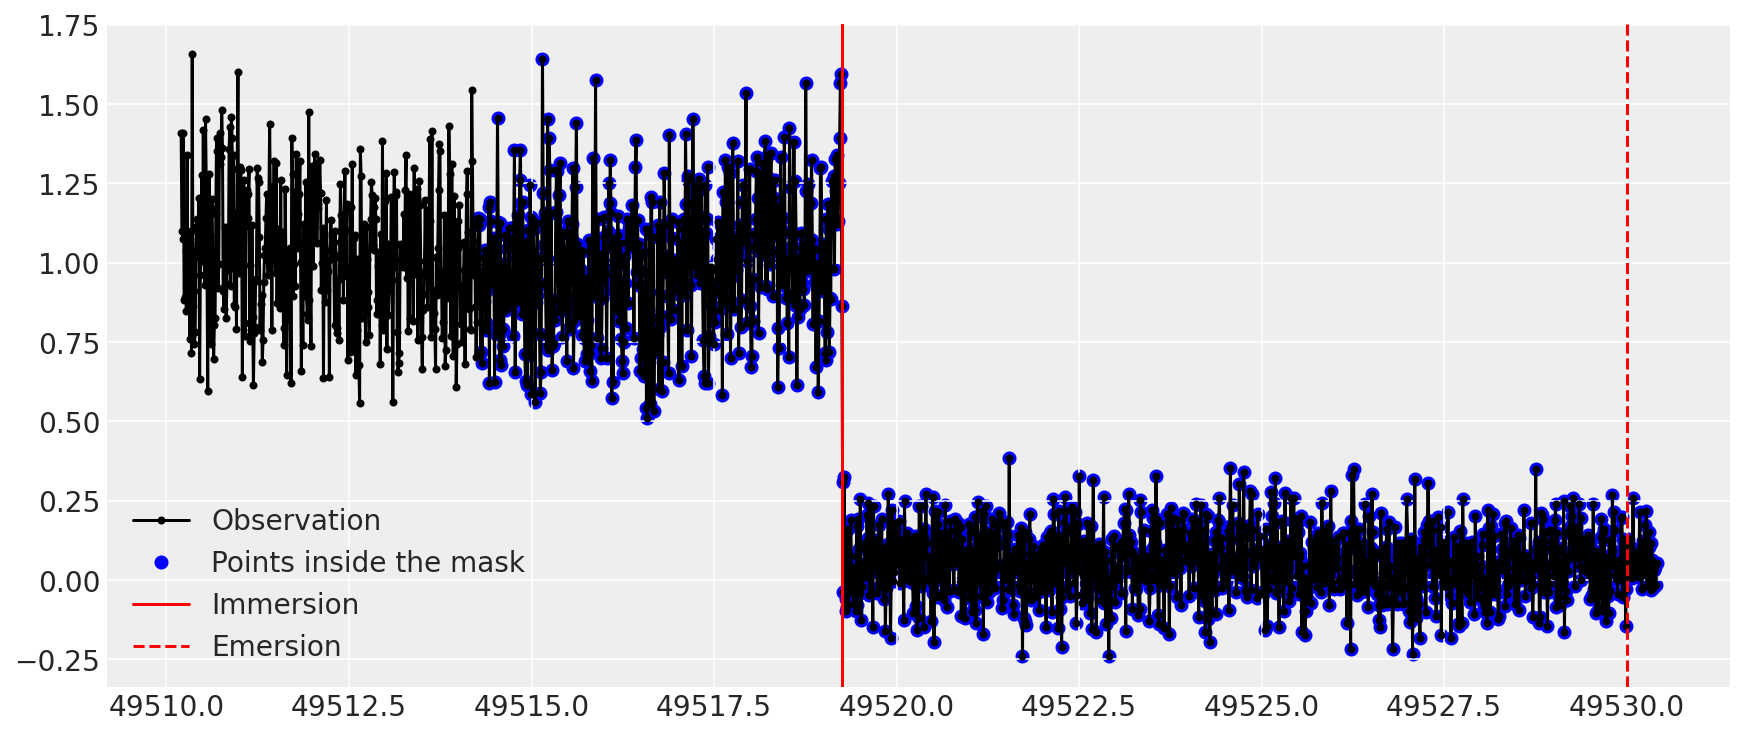

In [39]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time,color='r',linestyle='-',label='Immersion')
plt.axvline(emersion_time,color='r',linestyle='--',label='Emersion')
plt.legend()

In [40]:
lc_chi2 = lc.occ_lcfit(loop=1000)

LightCurve fit: |████████████████████████████████████████|  - 100% 


In [41]:
print(lc_chi2)

Minimum chi-square: 1161.881
Number of fitted points: 2001
Number of fitted parameters: 2
Minimum chi-square per degree of freedom: 0.581

immersion:
    1-sigma: 49519.260 +/- 0.002
    3-sigma: 49519.259 +/- 0.007

emersion:
    1-sigma: 49530.422 +/- 0.004
    3-sigma: 49530.415 +/- 0.011



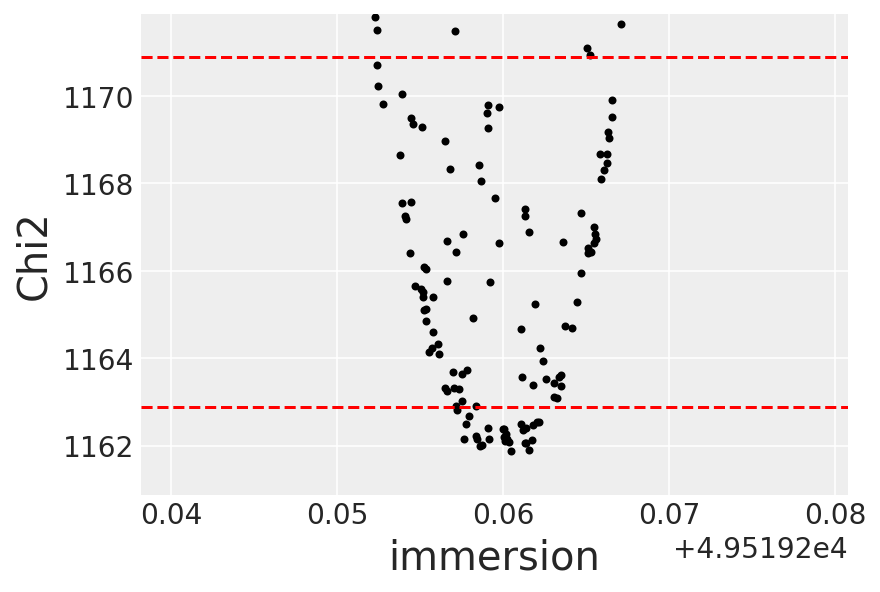

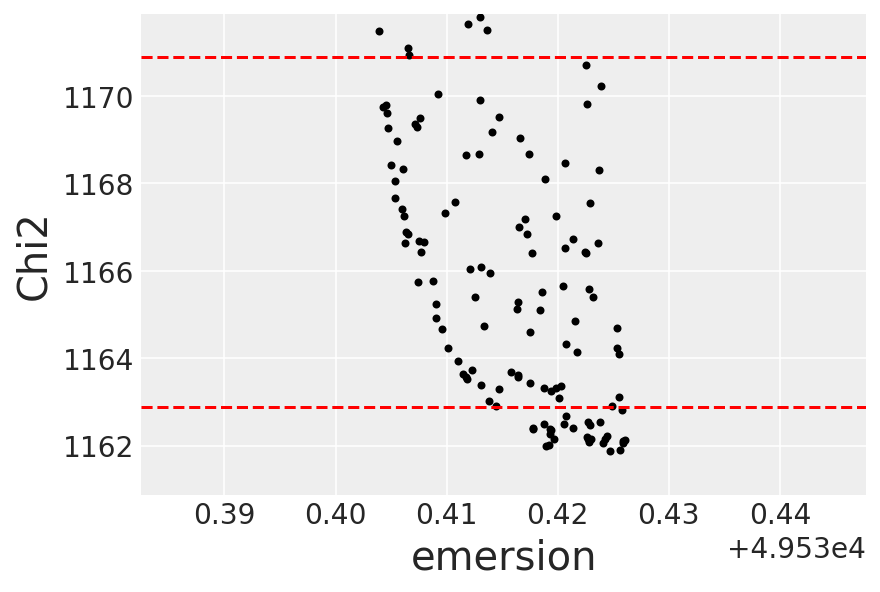

In [42]:
lc_chi2.plot_chi2()

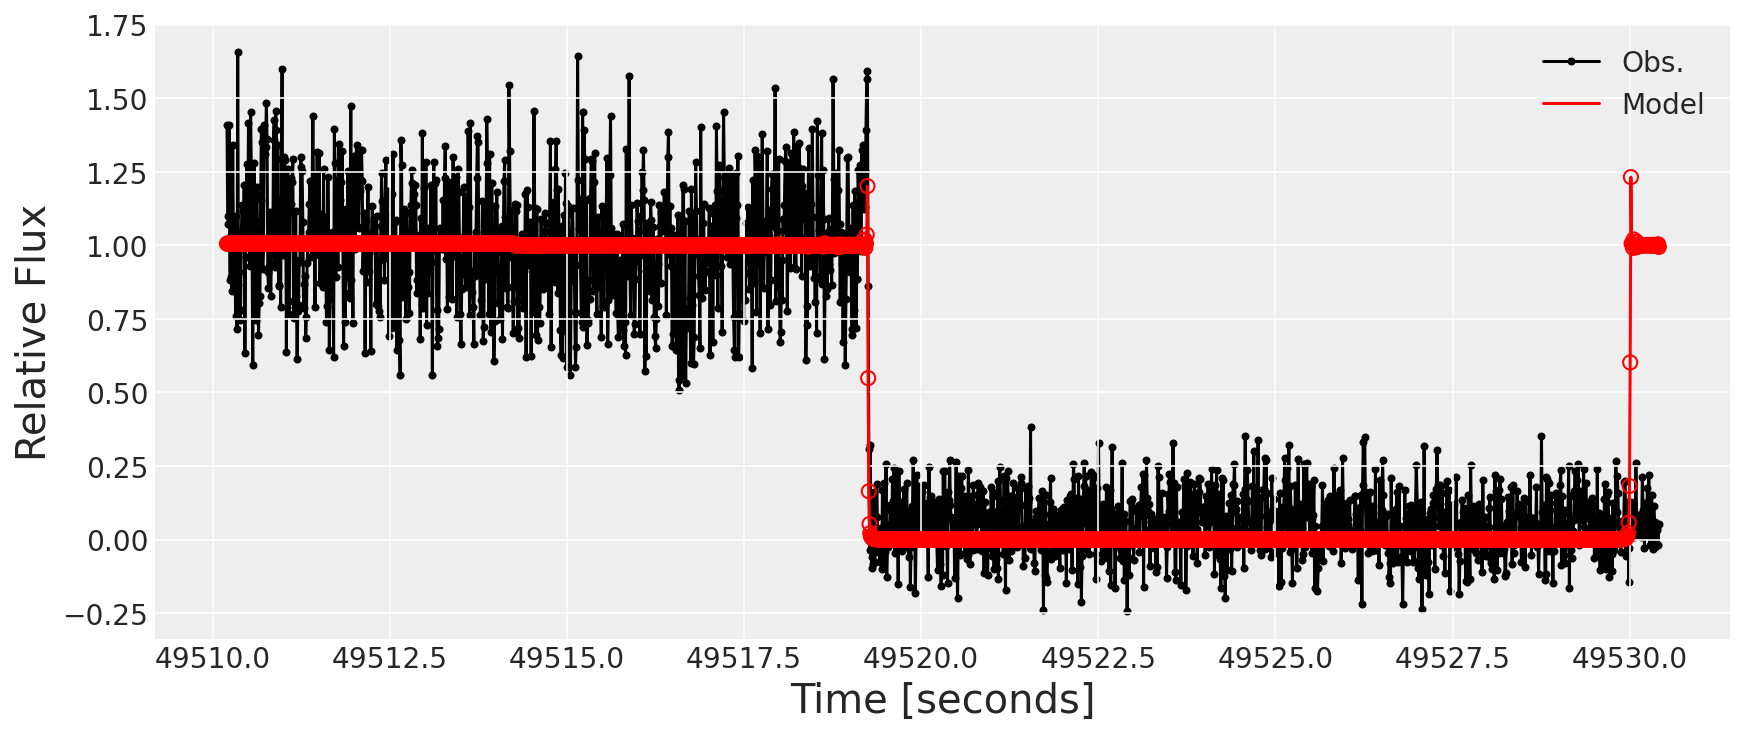

In [43]:
plt.figure(figsize=(12,5))
lc.occ_model(immersion_time, emersion_time, opacity, mask)

lc.plot_lc()
# plt.xlim(50680,50682)
# plt.ylim(-0.5,3)

Karena pada pengamatan ini tidak mengalami *emmersion*, maka plot *immersion* saja.

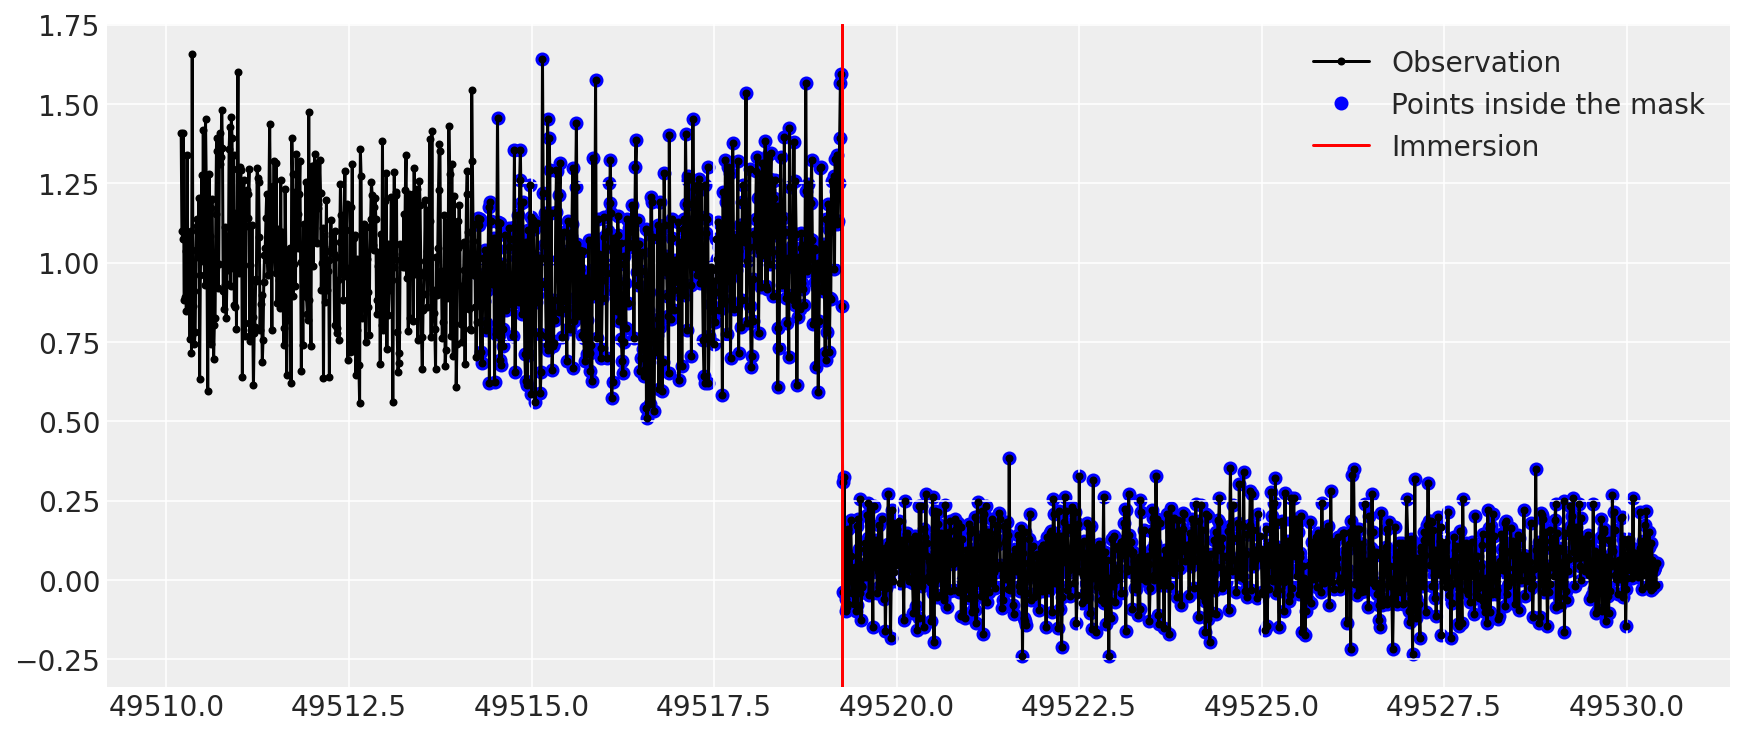

In [44]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time, color='r',linestyle='-',label='Immersion')
plt.legend()

In [45]:
lc_chi2_imm = lc.occ_lcfit(tmin=tmin, tmax=tmax, immersion_time=immersion_time, loop=1000)

LightCurve fit: |████████████████████████████████████████|  - 100% 


In [46]:
print(lc_chi2_imm)

Minimum chi-square: 757.443
Number of fitted points: 1599
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.474

immersion:
    1-sigma: 49519.260 +/- 0.003
    3-sigma: 49519.260 +/- 0.007



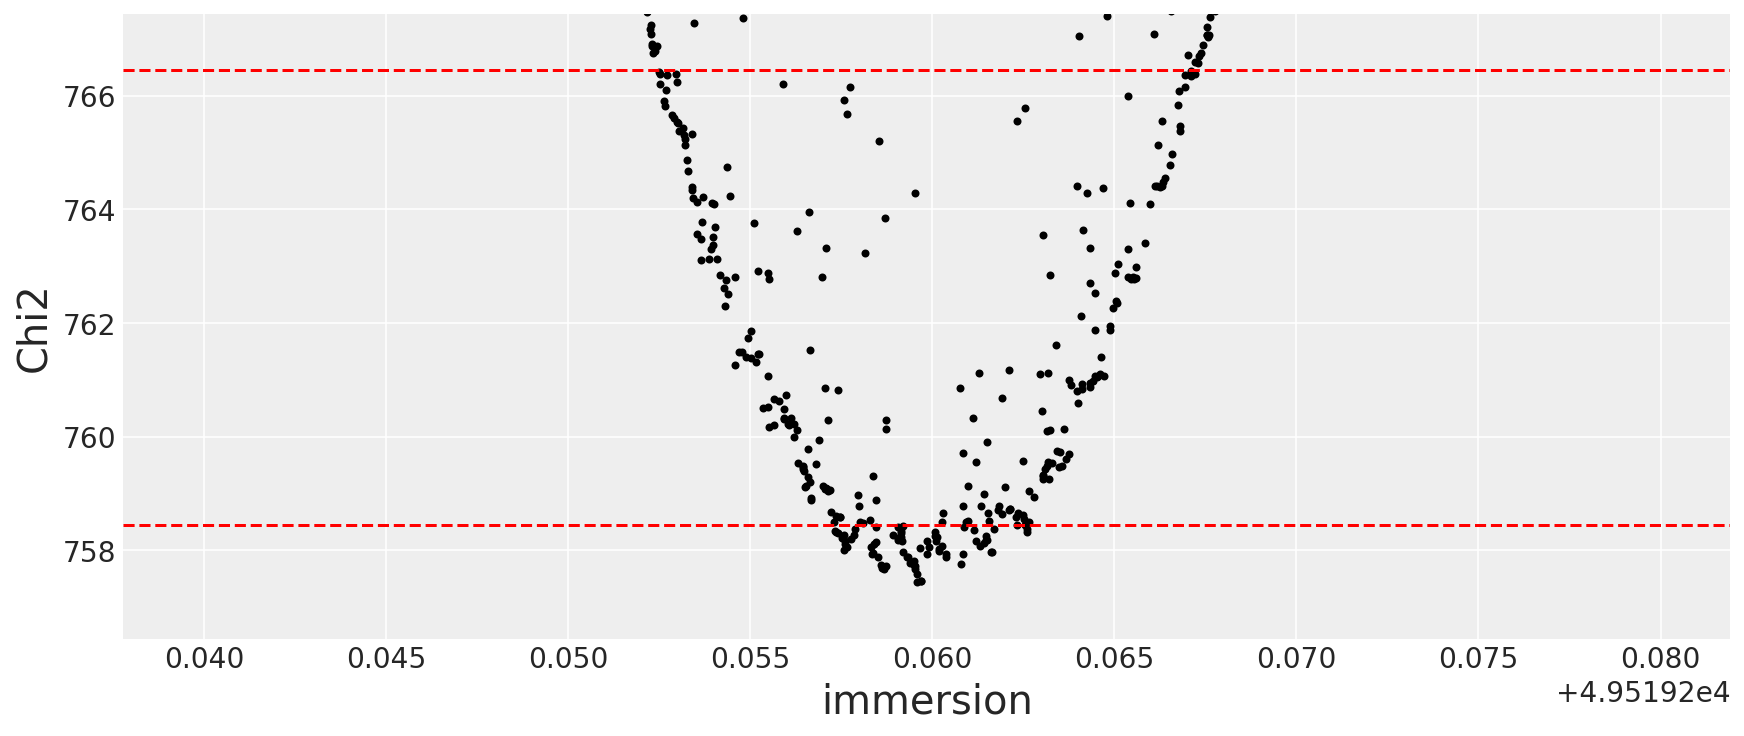

In [47]:
plt.figure(figsize=(12,5))
lc_chi2_imm.plot_chi2()

In [48]:
print(lc)

Light curve name: SAO 185716
Initial time: 2022-08-10 13:45:10.201 UTC
End time:     2022-08-10 13:45:30.411 UTC
Duration:     0.337 minutes
Time offset:  0.000 seconds

Exposure time:    0.0100 seconds
Cycle time:       0.0101 seconds
Num. data points: 2001

Bandpass:             0.550 +/- 0.200 microns
Object Distance:      0.00 AU
Used shadow velocity: 0.620 km/s
Fresnel scale:        0.016 seconds or 0.01 km
Stellar size effect:  0.001 seconds or 0.00 km
Inst. response:       0.010 seconds or 0.01 km
Dead time effect:     0.000 seconds or 0.00 km
Model resolution:     0.001 seconds or 0.00 km
Modelled baseflux:    1.006
Modelled bottomflux:  0.050
Light curve sigma:    0.214

Immersion time: 2022-08-10 13:45:19.260 UTC +/- 0.003 seconds
Emersion time:  2022-08-10 13:45:30.422 UTC +/- 0.004 seconds

Monte Carlo chi square fit.

Minimum chi-square: 757.443
Number of fitted points: 1599
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.474

immersion:
    1-si

(49518.5, 49520.0)

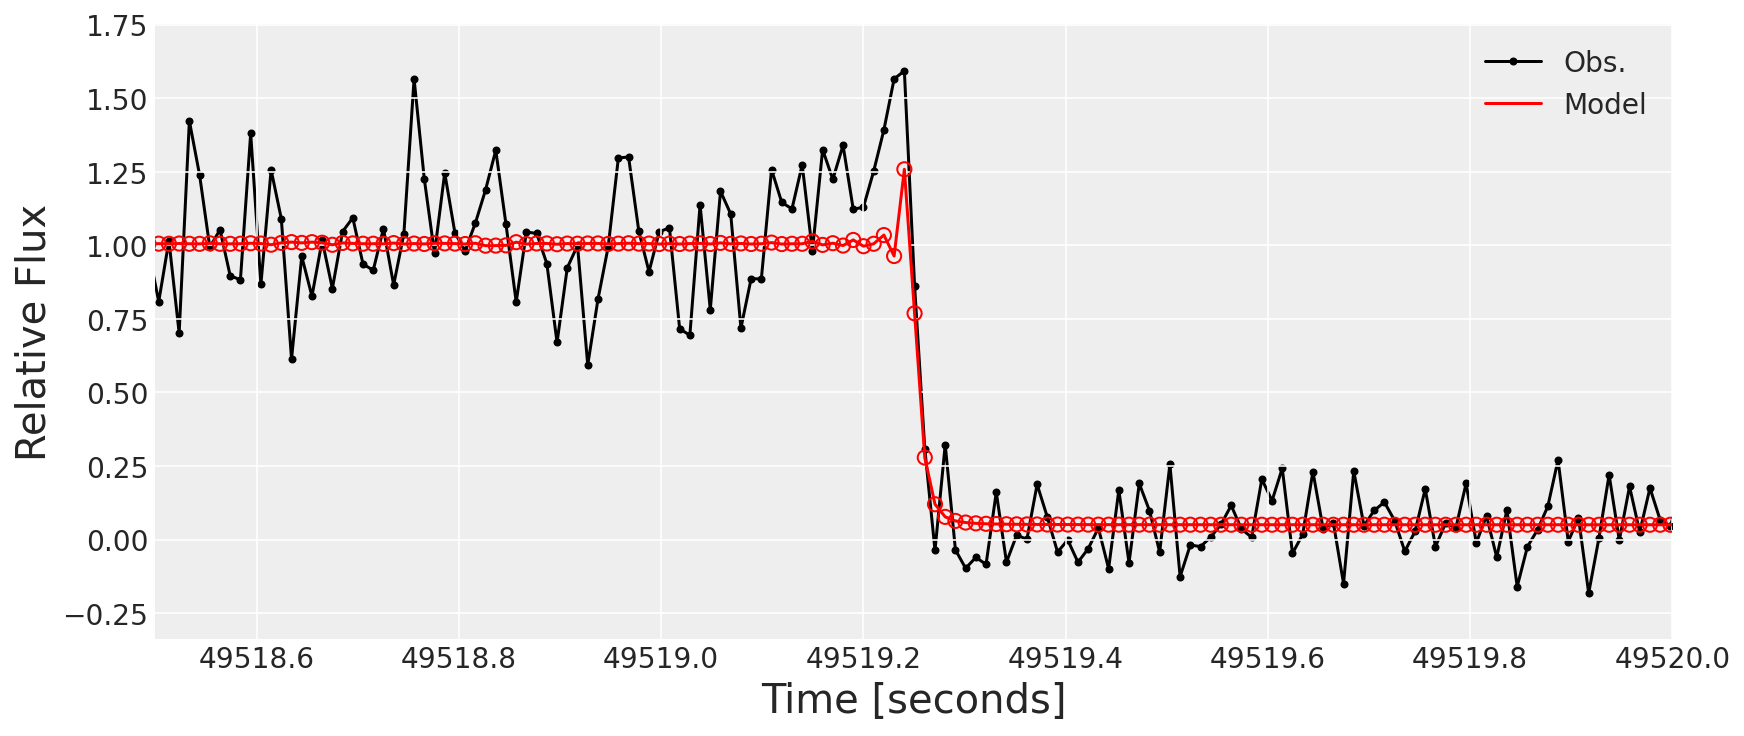

In [54]:
plt.figure(figsize=(12,5))
lc.plot_lc()
plt.xlim(49518.5, 49520)

(49518.5, 49520.0)

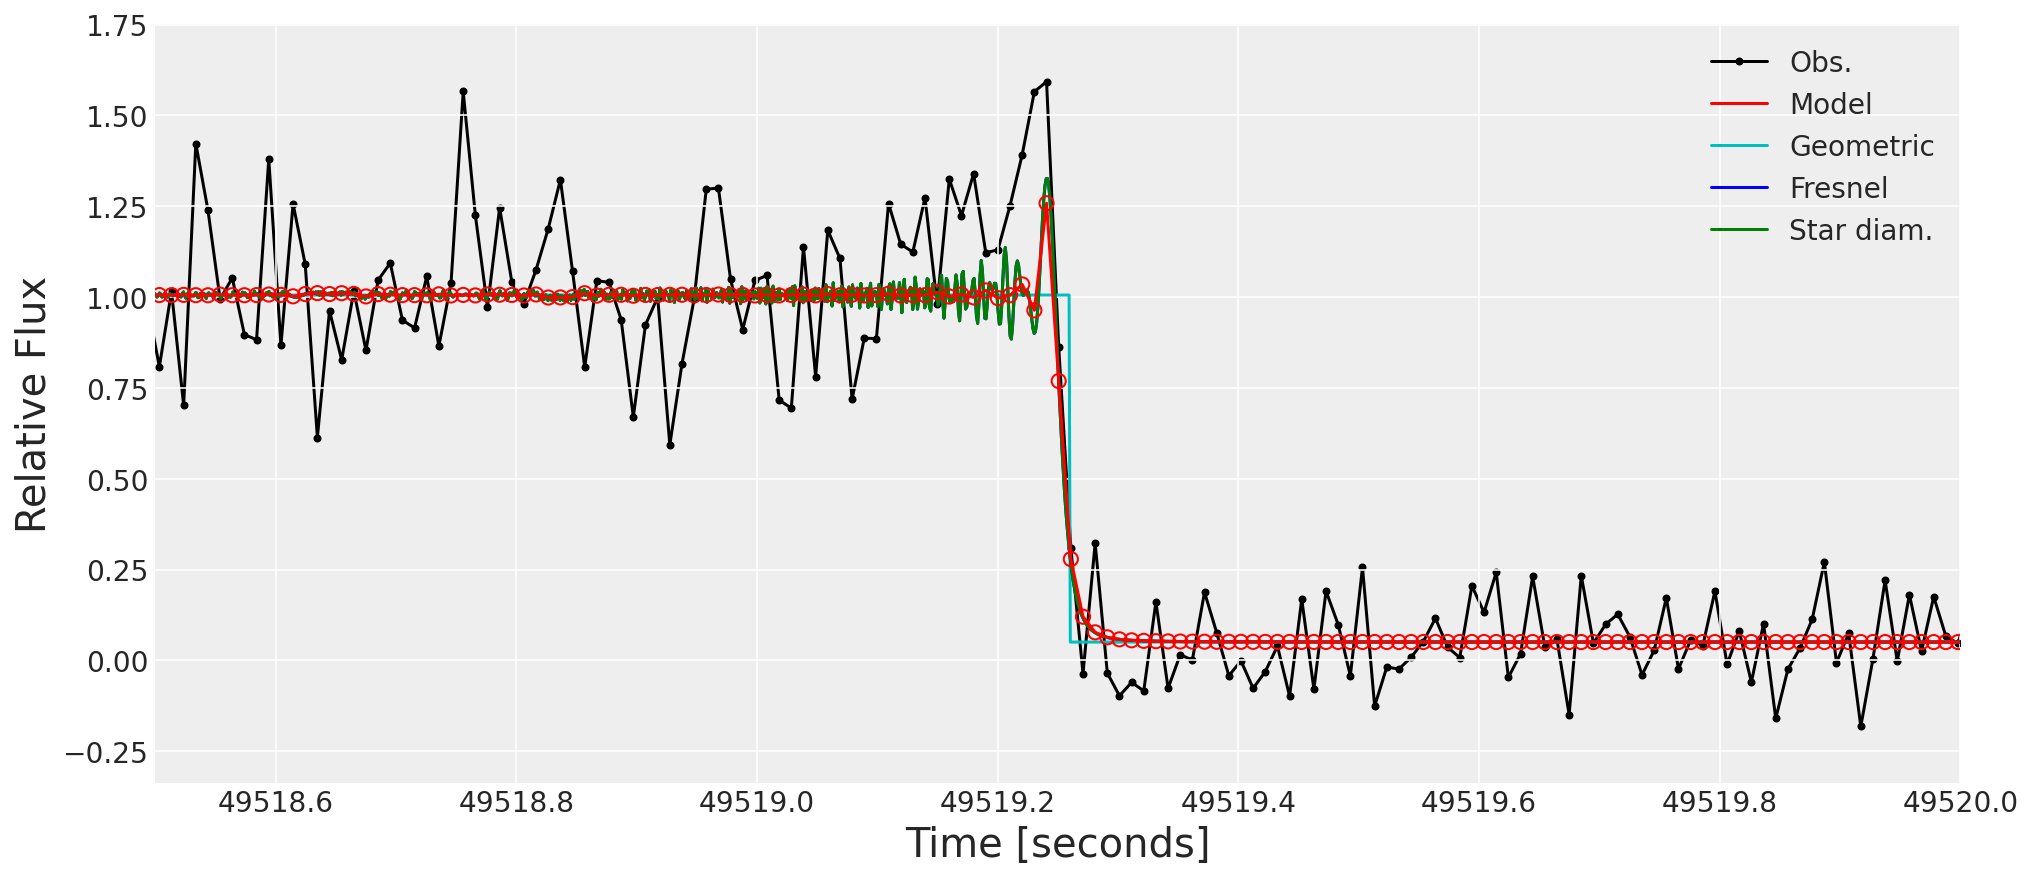

In [55]:
plt.figure(figsize=(14,6))
lc.plot_lc()
lc.plot_model()

plt.xlim(49518.5, 49520)
# plt.ylim(-0.25, 1.5)

In [56]:
lc.immersion

<Time object: scale='utc' format='iso' value=2022-08-10 13:45:19.260>